# Intro
About 2 months ago I released a Python Package called Potosnail, It started out as a collection of helper functions I built for my Wikipedia Capstone project https://spencerholley.medium.com/how-i-built-an-ai-app-with-heroku-c321f36cc371. However I've since added higher level functions that, in theorey, can automate the modeling process. There is no substitute for domain knowledge and intuition but Potosnail can take a massive leap in this process. What potosnail does is take emphasis off of the modeling step in the Data Science Pipeline, allowing data scientists to shift their focus more towards the data. That time can then be spent on collecting data, engineering features, and seeking to understand the industry that the project is besed in. 

I feel like many people starting out in Data Science, I know I did, come in with the opposite approach. They get an easy to work with dataset from Kaggle, and then spend all their time building models. This leads people to think that building models is the most important, which leads to an artificial sense of confidence when they do a simple .fit() and get a high accuracy. Then they get frustrated when they actually look at jobs and see that they only have experiance in a small chunk of the job. This is where Potosnail can help! With Potosnail there is no need to spend all this time on the modeling process! Instead, you can pass in your data, get a model that's about there in terms of tuning, and evaluate it. From there you can manipulate data to get a better output, the time saved will also give you more time for EDA which will allow you to create better features in your data as well as allow beginners to shift their focus to learning Data Collection, Data Storytelling, and presenting to nontechnical audiences. 

Enough talk! I'm going to walk you through an example for an initial Potosnail setup that you could iterate off of. In this tutorial I'm using the SyriaTel customer churn dataset which is available on Kaggle. I will also note that I've already cleaned this dataset and am using the cleaned dataset.

## Install / import
You can install the latest version of Potosnail via '''pip install Potosnail==0.2.1'''. from there you can import via '''import potosnail'''. 

In [35]:
from potosnail import *
import numpy as np

# the 7 classes of Potosnail
ml = MachineLearning() #builds sklearn models
dl = DeepLearning() #builds keras models
dh = DataHelper() #handles data preprocessing for structured data
ev = Evaluater() #some vizulizations and model evaluation functions
al = Algorithms() #helps calculate values for parameters
wr = Wrappers() #warps up several functions into a single function, much like a pipeline
st = Stats() #calculates some basic statistics

In [2]:
# load in data
import pandas as pd

df = pd.read_csv(r'C:\Users\aacjp\OneDrive\Desktop\data\tables\ChurnData_ForML.csv').drop(['Unnamed: 0'], axis='columns')

#manpulate data here

train, val = dh.HoldOut(df) #creating a 10% holdout dataset
train.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,churn,%night,%eve,avg duration,Midwest,Noncontinental,Northeast,Northwest,Southeast,Southwest
148,0,0,0,181.5,121,30.86,218.4,98,18.56,161.6,...,0,32,30,0.573464,0.0,0.0,0.0,0.0,1.0,0.0
334,0,0,0,201.3,95,34.22,152.8,66,12.99,233.2,...,0,39,25,0.446109,0.0,0.0,0.0,1.0,0.0,0.0
211,1,0,0,203.5,100,34.60,247.6,103,21.05,194.3,...,0,32,35,0.460180,0.0,0.0,0.0,0.0,0.0,1.0
2770,0,1,30,106.5,65,18.11,225.7,108,19.18,188.6,...,0,26,46,0.449309,0.0,0.0,1.0,0.0,0.0,0.0
2812,0,1,33,137.8,95,23.43,235.5,128,20.02,268.1,...,0,24,44,0.456813,0.0,0.0,0.0,0.0,0.0,1.0


# Machine Learning
Once we have a cleaned dataset in our hands, we can dive into modeling. any features we want to add, drop, combine, or change should be done before this step. We use WrapML from the Wrapper class. This function preforms girdsearches, scales data, filters out multicolinearity for regression problems, handles imbalanced data for classification, and uses SelectKBest to do feature engineering with existing features. The output is a list that contains the model, feature combination, dataset, and scaling method that yield the best results. This function takes in three arguments; data, target, and task. We also have a kwarg quiet, which I set equal to False. With this setting the function prints scores along the way so you can see the process, I should also note that these scores are not the same. For classification problems it's a combination of AUC with accuracy, precision, or recall but it is accuracy for regression.

In [3]:
kit = wr.WrapML(train, 'churn', 'classification', quiet=False)

raw data, baseline model: 0.6857142857142857
Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:   41.1s finished


raw data, tuned model: 0.7142857142857143
Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:   34.9s finished


data has been scaled with standard scaler
Smoting!!

Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:   46.4s finished


data is smoted, tuned model: 0.8285714285714286
Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:   33.9s finished


Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:   40.7s finished


Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:   39.4s finished


Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:   43.2s finished


data is smoted, tuned model, using 18 features: 0.8857142857142857


In [4]:
kit

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='entropy', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=78,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
              0         1         2         3         5         6         8  \
 0    -0.335456 -0.623770 -0.597139 -0.203271 -0.203433 -0.884219 -0.884264   
 1    -0.335456 -0.623770 -0.597139 -0.019592 -0.019432  0.627891  0.627252   
 2    -0.335456 -0.623770 -0.597139 -0.288746 -0.289015  1.380981  1.380685   
 3    -0.335456  1.603155  1.734296  0.535084  0.534711  0.969845  0.969087   
 4    -0.335456 -0.623770 -0.597139 -0.003224 -

In [28]:
kit[3]

'standard'

The next step is to inspect the 'kit'. By doing this we can see the best model, see how the data has changed, and find out what if any scaling methods were used. We then send our hold out dataset, val, through the same scaler and select the same features from it. This way both datasets are compatable.

In [40]:
model = kit[0]
X = kit[1].drop(['churn'], axis='columns')
y = kit[1]['churn']
scaler = kit[2]
Xval = dh.ScaleData('standard', val.drop(['churn'], axis='columns'))[list(X.columns)]
yval = val['churn']
#dim = kit[4] we only use this when we use pca 

Great! We can see the best model was a Random Forest. If we want we can tune it further with ml.Optimize() once we create a parameter grid.

In [ ]:
# explain output

In [ ]:
# demonstrate further tuning

In [42]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
#seeing what our tuned model looks like
model 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=78,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
# building a gridserch

#original gridsearch: {'n_estimators': [50, 45, 90, 135, 180, 225, 270, 315, 360, 405, 450], 
#'criterion': ['gini', 'entropy'], 'max_depth': [2, 5, 8, None]}

grid = {'bootstrap': [True, False],
        'max_depth': [9, 12, 15, None], #increasing max depth
        'max_leaf_nodes': [None, 10, 20, 30], #max number of nodes per tree, not counting leaf nodes
        'min_impurity_decrease': [0.0, 0.04, 0.1, 0.15], #prevents a greedy algorithm
        'min_samples_leaf': [1, 2], #minimum number of samples for a node
        'n_estimators': [70, 75, 80, 85, 90]}

clf = ml.Optimize(model, grid, X, y)
clf

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  4.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Once we feel good about the model, we can evaluate it. There are so many ways to do this, since we have a binary classification problem on our hands We'll do a confusion matrix with BuildConfusion() from the Evaluater class. As you can see, we are getting ~82% recall, recall is our metric because labeling churn customers as not churn is worse than labeling happy customers as churn, and ~96% overall accuracy. 

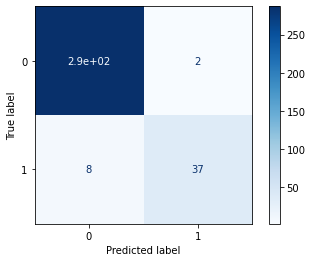

In [47]:
ev.BuildConfusion(clf, Xval, yval)

This is a good starting point, but it's important to have a more real world success metric. In an industry/bussiness setting we don't care about these terms. For this reason we will do a cost-benefit analysis. The cost of the model in this case would be dollars lost from giving out unnessecary discounts (false positives) and the benefit is dollars saved from keeping customers. The reason why benefit is so high is because preventing churn also saves the company the cost of aquiring that customer, which is USD350 in this case!

In [50]:
cba = ev.BinaryCBA(clf, Xval, yval, 56, 350, 14)
print('cost: ${}, benefit: ${}'.format(cba[0], cba[1]))

cost: $2828, benefit: $14504


# Wrapping it up
All of the following is a starting point to iterate off of, once you've got this set up you can keep researching the industry and doing EDA to improve the quality of this data. Then you can keep going; improve the data, improve the model, repeat! If you find that a certian feature isn't important in X industry than drop it, or find that Y is really important in X industry you can do what you need to find it. I will say that WrapML takes a long time to run, but that'll just give you more time to explore your data, make some visulizations in Tableau, research the industry, or maybe just play with your dog ;)

If you wish too you can keep reading to learn about Deep Learning with Potosnail!

# Deep Learning
Please note that this dataset probably isn't great for Deep Learning as it's quite small, This is more of a demo. If you want to see this used in the wild check out this repo https://github.com/spe301/Wikipedia-Capstone. Before we do anything we need to get the data and lables in the right format. They must be numpy arrays and the lables must be one hot encoded, (0, 1) instead of 0 and (1, 0) instead of 1. 

Once our data is right we can build a quick model with FastNN, we set output_dim to 2 and use binary_crossentropy for our loss function because we are working on a binary classification problem.

In [51]:
#getting our data into arrays, the neural network can't understand dataframes
X = np.array(X) 
y = dl.MulticlassOutput(np.array(y))
Xval = np.array(Xval)
yval = dl.MulticlassOutput(np.array(yval))

In [52]:
dm = dl.FastNN('classification', 'binary_crossentropy', output_dim=2) #a very simple feed-forward neural net
history = dm.fit(X, y, epochs=150, validation_split=0.2)

Epoch 1/150
115/115 [==============================] - 2s 7ms/step - loss: 0.6099 - accuracy: 0.6910 - val_loss: 0.5529 - val_accuracy: 0.8118
Epoch 2/150
115/115 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8491 - val_loss: 0.5379 - val_accuracy: 0.7998
Epoch 3/150
115/115 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.8828 - val_loss: 0.4120 - val_accuracy: 0.8520
Epoch 4/150
115/115 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.8891 - val_loss: 0.4325 - val_accuracy: 0.8248
Epoch 5/150
115/115 [==============================] - 0s 3ms/step - loss: 0.2791 - accuracy: 0.8963 - val_loss: 0.3154 - val_accuracy: 0.8694
Epoch 6/150
115/115 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.9105 - val_loss: 0.3930 - val_accuracy: 0.8455
Epoch 7/150
115/115 [==============================] - 0s 3ms/step - loss: 0.2360 - accuracy: 0.9112 - val_loss: 0.3654 - val_accuracy: 0.8455

This model is doing fine. There is no overfitting and it converges at near 100% accuracy. We use ViewLoss from the Evaluater class to do this.

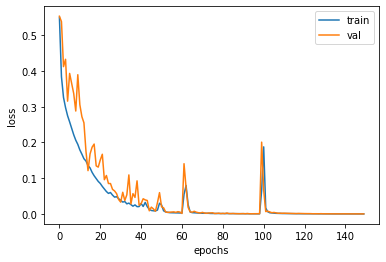

In [53]:
ev.ViewLoss(history)

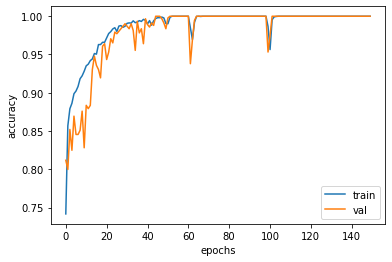

In [54]:
ev.ViewAccuracy(history)

In [55]:
dm.evaluate(Xval, yval)

11/11 [==============================] - 0s 2ms/step - loss: 0.8373 - accuracy: 0.9162


[0.8372958898544312, 0.916167676448822]

Not quite as good as the Random Forest's 82%recall at only 73%. However, I must note that this model hasn't been tuned in any way.

<AxesSubplot:xlabel='Predict', ylabel='True'>

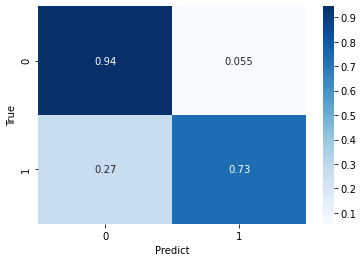

In [56]:
ev.BuildConfusionDL(dm, Xval, yval)

We use TestDL, this function facilitates gridsearches for keras models. We use DeepTabularClassification as our model building function. Basically all it does is build feed-forward networks for classification tasks. In it's use it will build models in accordinance with the parameters given in the grid below. At the end we use .best_estimator_.model to see the best model, We can then inspect it with a .summary() or .best_params_.

In [61]:
grid = {'output_dim': [2], #only 2 possible outputs
        'nodes': [32, 64, 80], #nodes in the first layer 
        'activation': ['relu'],  
        'regularizer': [None, 'L1'], 
        'stacking': [True, False], #having an extra hidden layer the same size as the input layer
        'dropout': [True, False], 
        'nlayers': [4], #nlayers does not count the stacking or closer layers
        'closer': [False], #having an extra layer with output_dim x 2 nodes before the output
        'loss': ['binary_crossentropy'], 
        'optimizer': ['adam', 'rmsprop', 'sgd']}

grid = dl.TestDL(grid, dl.DeepTabularClassification, 'classification', X, y, epochs=150)
grid.best_estimator_.model

Epoch 1/150
39/39 [==============================] - 2s 14ms/step - loss: 0.6812 - accuracy: 0.5580 - val_loss: 0.4869 - val_accuracy: 0.9641
Epoch 2/150
39/39 [==============================] - 0s 5ms/step - loss: 0.6378 - accuracy: 0.5799 - val_loss: 0.3804 - val_accuracy: 0.9935
Epoch 3/150
39/39 [==============================] - 0s 5ms/step - loss: 0.5936 - accuracy: 0.6167 - val_loss: 0.3323 - val_accuracy: 0.9445
Epoch 4/150
39/39 [==============================] - 0s 5ms/step - loss: 0.5498 - accuracy: 0.6913 - val_loss: 0.2980 - val_accuracy: 0.9152
Epoch 5/150
39/39 [==============================] - 0s 5ms/step - loss: 0.5318 - accuracy: 0.7463 - val_loss: 0.2457 - val_accuracy: 0.8956
Epoch 6/150
39/39 [==============================] - 0s 5ms/step - loss: 0.5030 - accuracy: 0.7672 - val_loss: 0.2395 - val_accuracy: 0.8809
Epoch 7/150
39/39 [==============================] - 0s 5ms/step - loss: 0.4852 - accuracy: 0.8010 - val_loss: 0.2402 - val_accuracy: 0.8744
Epoch 8/150


In [62]:
grid.best_params_

{'activation': 'relu',
 'closer': False,
 'dropout': False,
 'loss': 'binary_crossentropy',
 'nlayers': 4,
 'nodes': 80,
 'optimizer': 'adam',
 'output_dim': 2,
 'regularizer': None,
 'stacking': False}

In [65]:
dm2 = grid.best_estimator_.model
dm2.evaluate(Xval, yval)

11/11 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.9192


[0.4711554944515228, 0.9191616773605347]

Our tuned model did 3% better on recall, but with better feature engineering , and maybe more tuning, could certainly do better.

<AxesSubplot:xlabel='Predict', ylabel='True'>

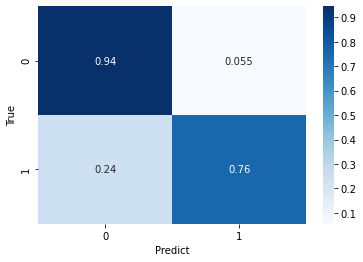

In [66]:
ev.BuildConfusionDL(dm2, Xval, yval)

# Why the heck is it called Potosnail?